In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [3]:
x = np.random.rand(200, 1)
X = np.hstack((x**4, x**3, x**2, x))

y = 7 * x ** 4 + 5 * x ** 3 + x ** 2 + x + 7
y = y + np.random.normal(scale=1, size=y.shape)

#X = x.reshape(-1, 1)
#y = y.reshape(-1, 1)

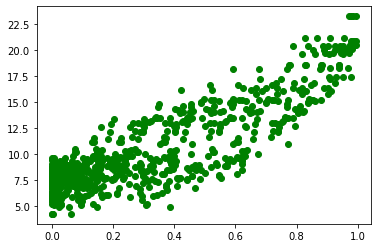

In [4]:
plt.plot(X, y, 'go')

In [5]:
split = int(X.shape[0] * 0.8)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [6]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


In [7]:
model = LinearRegression(normalize=True)

In [8]:
model.fit(X_train, y_train)
print(model.coef_, model.intercept_)

[[-1.72551859  8.76067432 -4.11849272  0.84570121]] [10.18471761]


In [9]:

print('train score:', model.score(X_train, y_train), 'test score:', model.score(X_test, y_test))

train score: 0.9287444737543545 test score: 0.9344429212583104


In [10]:
h_train = model.predict(X_train)
MSE_train = np.mean((y_train - h_train) ** 2) / 2
h_test = model.predict(X_test)
MSE_test = np.mean((y_test - h_test) ** 2) / 2
print(MSE_train, MSE_test)

0.5442508973655313 0.5933551662918022


(200, 4) (200, 1)


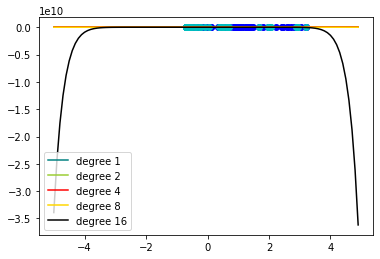

In [11]:
x_line = np.arange(-4, 6, 0.1).reshape(-1, 1)
x_line = np.hstack((x_line, x_line ** 2, x_line ** 3, x_line ** 4))
#y_line = model.predict(x_line)

plt.plot(X_train[:, 0], y_train, 'bo')
plt.plot(X_test[:, 0], y_test, 'co')
#plt.plot(x_line[:, 0], y_line, 'r--')

print(X.shape, y.shape)
x_plot = np.arange(-5, 5, 0.1).reshape(-1, 1)
X_plot = x_plot[:, np.newaxis]
colors = ['teal', 'yellowgreen', 'red', 'gold', 'black']
for count, degree in enumerate([1, 2, 4, 8, 16]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(x, y)
    y_plot = model.predict(x_plot)
    plt.plot(x_plot, y_plot, color=colors[count],
            label='degree %d' % degree)
plt.legend(loc='lower left')

In [20]:
X = x
clf = LinearRegression()

train_sizes, train_score, test_score = learning_curve(clf, X, y, cv=5)

Text(0, 0.5, 'Score')

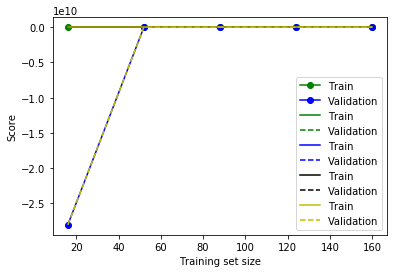

In [23]:
plt.plot(train_sizes, train_score.mean(axis=1), 'go-', label='Train')
plt.plot(train_sizes, test_score.mean(axis=1), 'bo-',label='Validation')
degree = [2, 4, 8, 16]
colors = ['g', 'b', 'k', 'y']
for n in range(4):
    i = degree[n]
    for i in range(2, i+1):
        X = np.hstack((x**i, X))
    clf = LinearRegression()
    train_sizes, train_score, test_score = learning_curve(clf, X, y, cv=5)
    plt.plot(train_sizes, train_score.mean(axis=1), '-',color=colors[n], label='Train')
    plt.plot(train_sizes, test_score.mean(axis=1), '--', color=colors[n], label='Validation')
    X = x
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Score')